In [1]:
#지역별 저상버스 보급 현황
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
!cd ../
!git pull

Already up to date.


In [3]:
!sed -i 's/archive.ubuntu.com/ftp.daumkakao.com/g' /etc/apt/sources.list
!apt-get update
!fc-cache -fv
!apt-get install -y fonts-nanum
!rm -rf ~/.cache/matplotlib/*
plt.rc('font', family='NanumBarunGothic')

import matplotlib as mpl
mpl.matplotlib_fname()
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://security.debian.org/debian-security buster/updates InRelease
Get:3 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Fetched 51.9 kB in 1s (99.5 kB/s) 
Reading package lists... Done
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 6 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/X11R6/lib/X11/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cl

In [8]:
df = pd.read_csv('/The_MoDeep/data/저상버스보급.csv', encoding='cp949')
df.columns = ['year', 'supply', 'seoul', 'gyeonggi', 'jeolla', 'gyeongsang', 'gangwon', 'chungcheong', 'jeju']
df
#df.info()

,year,supply,seoul,gyeonggi,jeolla,gyeongsang,gangwon,chungcheong,jeju
0,2013,16.4,28.5,12.0,8.2,14.6,27.9,12.8,6.0
1,2014,18.5,32.5,12.6,10.6,15.3,30.0,15.0,6.0
2,2015,20.7,35.2,13.8,14.2,17.0,32.5,15.9,6.0
3,2016,22.3,40.4,13.3,18.3,17.7,34.3,15.9,5.2
4,2017,22.4,43.6,13.3,14.2,15.3,28.7,14.7,17.4
5,2018,23.4,45.0,12.7,16.9,16.3,34.8,13.9,22.6
6,2019,26.5,53.9,13.6,18.2,18.5,34.7,15.2,26.8


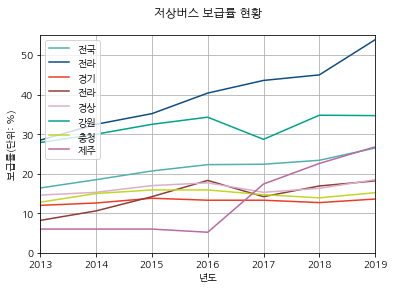

In [45]:
#데이터 추출
Year_df = list(df.year)
Supply_df = list(df.supply)
Seoul_df = list(df.seoul)
Gyeonggi_df = list(df.gyeonggi)
Jeolla_df = list(df.jeolla)
Gyeongsang_df = list(df.gyeongsang)
Gangwon_df = list(df.gangwon)
Chungcheong_df = list(df.chungcheong)
Jeju_df = list(df.jeju)

#print(Year_df)
#print(Supply_df)
#print(Seoul_df)
#print(Gyeonggi_df)
#print(Jeolla_df)
#print(Gyeongsang_df)
#print(Gangwon_df)
#print(Chungcheong_df)
#print(Jeju_df)

plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019])
#plt.yticks([1, 2, 3, 4, 5])
Tit = "저상버스 보급률 현황"

ax = plt.gca()
ax.xaxis.grid(True)
ax.yaxis.grid(True)

plt.title(Tit, loc='center', pad=20)
ax.set_xlabel("년도")
ax.set_ylabel("보급률(단위: %)")

plt.ylim(0, 55)
plt.xlim(2013, 2019)
plt.plot(Year_df, Supply_df, '#4fb0ae', label='전국')
plt.plot(Year_df, Seoul_df,'#0f4c81', label='전라')
plt.plot(Year_df, Gyeonggi_df, '#EB3C27', label='경기')
plt.plot(Year_df, Jeolla_df, '#8E3C36', label='전라')
plt.plot(Year_df, Gyeongsang_df, '#D9AFCA', label='경상')
plt.plot(Year_df, Gangwon_df, '#00A28A', label='강원')
plt.plot(Year_df, Chungcheong_df, '#C0D725', label='충청')
plt.plot(Year_df, Jeju_df, '#BA69A1', label='제주')

plt.legend()
plt.savefig('Employ_Status(dis).png')